In [1]:
import keras
import numpy as np
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [ ]:
# !pip install numpy == 1.16.1

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
help(imdb.load_data)

Help on function load_data in module keras.datasets.imdb:

load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)
    Loads the IMDB dataset.
    
    # Arguments
        path: where to cache the data (relative to `~/.keras/dataset`).
        num_words: max number of words to include. Words are ranked
            by how often they occur (in the training set) and only
            the most frequent words are kept
        skip_top: skip the top N most frequently occurring words
            (which may not be informative).
        maxlen: sequences longer than this will be filtered out.
        seed: random seed for sample shuffling.
        start_char: The start of a sequence will be marked with this character.
            Set to 1 because 0 is usually the padding character.
        oov_char: words that were cut out because of the `num_words`
            or `skip_top` limit will be replaced with this character.
      

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [7]:
x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환합니다

(25000, 10000)
(25000, 10000)


In [8]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
print(y_train[:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [12]:
# Data split for validation data
split_idx = 10000

x_val = x_train[:split_idx]
partial_x_train = x_train[split_idx:]

y_val = y_train[:split_idx]
partial_y_train = y_train[split_idx:]

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decoded text for data0
decoded_review0 = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [14]:
decoded_review0

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
# Build Model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
# Model Compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [17]:
# Model Training and save training history
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))
                    


Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 366us/step - loss: 0.5422 - acc: 0.7965 - val_loss: 0.4208 - val_acc: 0.8678
Epoch 2/20
15000/15000 [==============================] - 5s 353us/step - loss: 0.3373 - acc: 0.8977 - val_loss: 0.3206 - val_acc: 0.8835
Epoch 3/20
15000/15000 [==============================] - 5s 336us/step - loss: 0.2463 - acc: 0.9213 - val_loss: 0.2908 - val_acc: 0.8868
Epoch 4/20
15000/15000 [==============================] - 4s 234us/step - loss: 0.1945 - acc: 0.9369 - val_loss: 0.2746 - val_acc: 0.8910
Epoch 5/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1576 - acc: 0.9506 - val_loss: 0.2809 - val_acc: 0.8876
Epoch 6/20
15000/15000 [==============================] - 3s 197us/step - loss: 0.1298 - acc: 0.9600 - val_loss: 0.3039 - val_acc: 0.8788
Epoch 7/20
15000/15000 [==============================] - 3s 198us/step - 

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

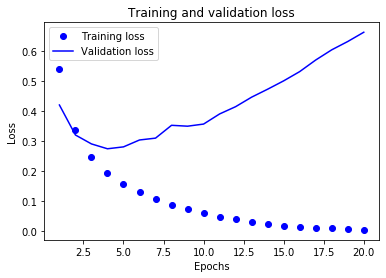

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

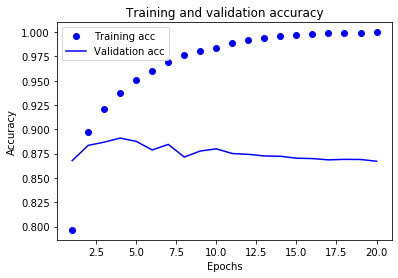

In [21]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 144us/step - loss: 0.4580 - acc: 0.8289
Epoch 2/4
25000/25000 [==============================] - 3s 132us/step - loss: 0.2644 - acc: 0.9108
Epoch 3/4
25000/25000 [==============================] - 3s 134us/step - loss: 0.2005 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 3s 136us/step - loss: 0.1698 - acc: 0.9406


In [23]:
result = model.predict(x_test)

In [24]:
result

array([[0.24158481],
       [0.99987215],
       [0.90894395],
       ...,
       [0.13347298],
       [0.10367325],
       [0.72819495]], dtype=float32)

In [25]:
#  thresholding

for i in range(len(result)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
  


In [26]:
result

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)